In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data_2_ml.csv", sep=" ")
data.sample(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
756,4.0,4.0,1.0,3.0,2.0,15794797,Postman. Знакомство с инструментом,Профессия инженер по тестированию 28.0 Професс...,Тестирование API,Профессия QA,0.25,1.666667
1453,5.0,5.0,5.0,5.0,5.0,16024429,Введение в тестирование API,Профессия инженер по тестированию 29.0 Професс...,Тестирование API,Профессия QA,1.00,0.000000
2678,3.0,3.0,3.0,3.0,3.0,15726943,Делегирование дел и забота о себе,Профессия инженер по тестированию 28.0 Професс...,Soft-трек,Профессия QA,0.00,0.000000


In [3]:
ratings = ['overall', 'interesting', 'clarity', 'materials', 'tasks']

In [4]:
is_nan_count = data[ratings[1:5]].isna().sum(axis=1).reset_index().drop(
    'index', axis=1)
is_nan_count.columns = ['is_nan']
is_nan_count.groupby(['is_nan'])['is_nan'].count()

is_nan
0    3075
1     269
2      84
3      18
4      10
Name: is_nan, dtype: int64

In [5]:
data_2_ml = data.dropna()
data_2_ml.sample(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
2373,5.0,4.0,4.0,5.0,5.0,16331071,Практическое задание по Java Core. Экзаменацио...,Профессия Digital Sprint Java-разработчик 3.0,1. Введение в профессию и синтаксис языка,Профессия Sprint Java разработчик,1.0,0.333333
1645,2.0,1.0,3.0,3.0,2.0,16245824,Урок без имени,Поток без имени,Модуль без имени,Профессия Директор по Маркетингу,0.0,0.916667
1660,3.0,3.0,2.0,3.0,3.0,3730918,"Урок 1. Основы Python, переменные и типы данных",Профессия Аналитик данных 22.0,Python,Профессия Аналитик данных,0.0,0.250000


In [6]:
data_bolean = data_2_ml[[
    'overall', 'interesting', 'clarity', 'materials', 'tasks', 'share45', 'var'
]].copy()
mask = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}
for each in [
        0,
        1,
        2,
        3,
        4,
]:
    data_bolean[ratings[each]] = data_bolean[ratings[each]].map(mask)
data_bolean.sample(3)

,overall,interesting,clarity,materials,tasks,share45,var
178,1,1,1,1,1,1.0,0.00
456,1,1,1,1,1,1.0,0.00
1883,1,1,1,1,1,1.0,0.25


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
X = data_bolean.drop(['overall'], axis=1)
y = data_bolean['overall']

In [ ]:
from sklearn.model_selection import train_test_split

In [10]:
sensitivities = pd.DataFrame(columns=['test_size', 'acc'])

warnings.filterwarnings('ignore')  # отключаем "розовые бумажки"

for each in range(1, 100, 1):

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=each / 100,
                                                        random_state=4)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    sensitivities = sensitivities.append(
        {'test_size': each, 'acc': acc}, ignore_index=True)

warnings.filterwarnings('default')  # включаем "розовые бумажки"

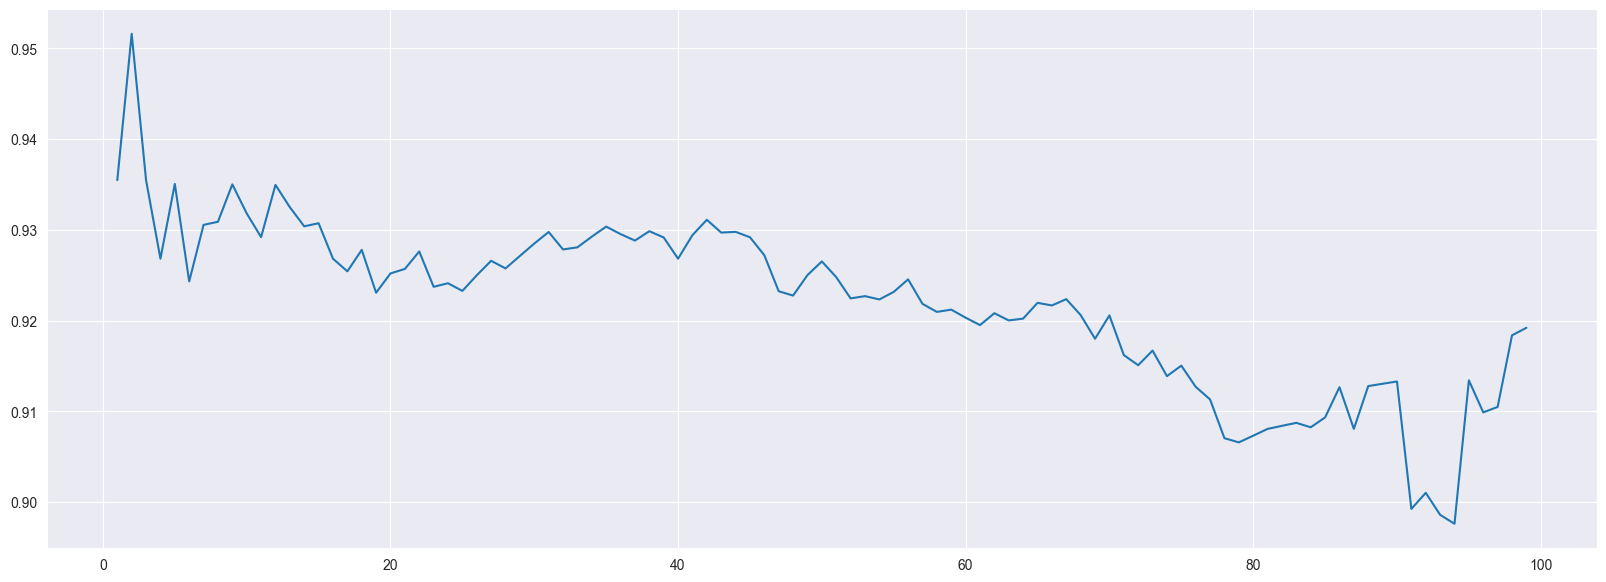

In [11]:
plt.figure(figsize=(20, 7))
plt.plot(sensitivities['test_size'], sensitivities['acc'])
plt.show()

In [12]:
acc = accuracy_score(y_test, y_pred)
f'{acc*100:.1f}%'

'91.9%'

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 309,  165],
       [  81, 2490]], dtype=int64)

<AxesSubplot: >

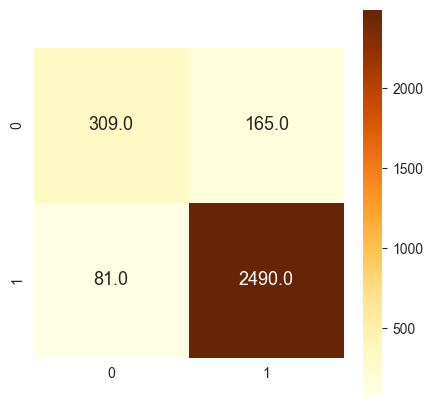

In [14]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot: >

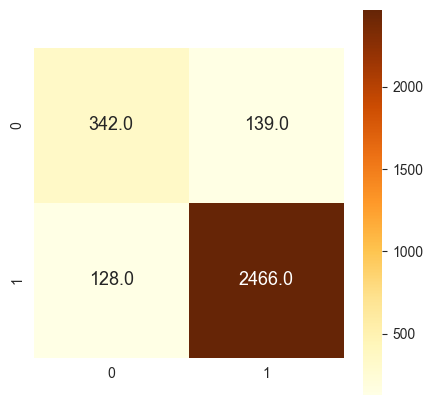

In [15]:
cm_1 = confusion_matrix(data_bolean['overall'], data_bolean['interesting'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_1,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

In [16]:
cm_1

array([[ 342,  139],
       [ 128, 2466]], dtype=int64)

<AxesSubplot: >

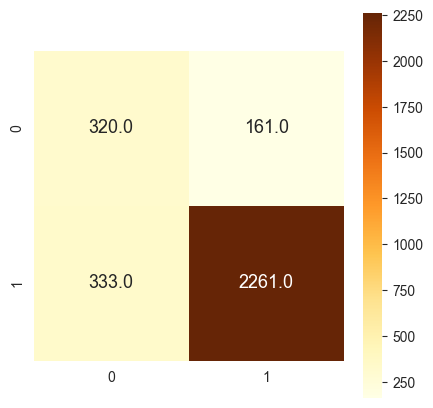

In [17]:
cm_2 = confusion_matrix(data_bolean['overall'], data_bolean['clarity'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_2,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot: >

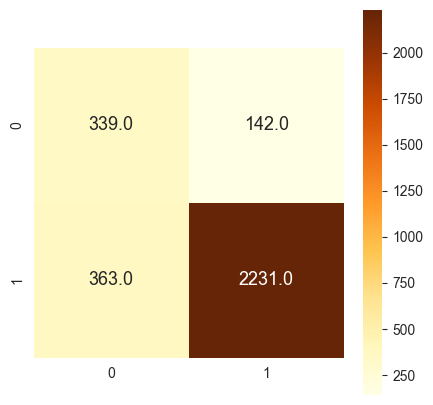

In [18]:
cm_3 = confusion_matrix(data_bolean['overall'], data_bolean['materials'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_3,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot: >

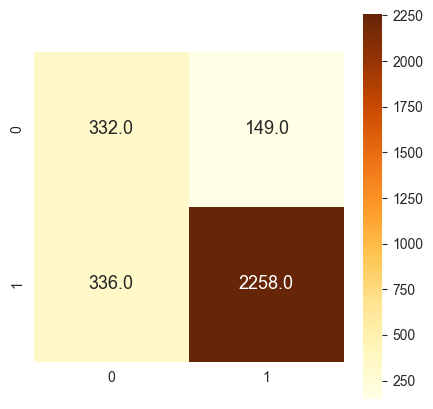

In [19]:
cm_4 = confusion_matrix(data_bolean['overall'], data_bolean['tasks'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_4,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

In [20]:
con_mat = [cm, cm_1, cm_2, cm_3, cm_4]
i = 0
print('Доля ошибок любого рода: \n')
for each in con_mat:
    print(ratings[i])
    i += 1
    print(
        f'{100 * (each[0][1] + each[1][0]) / (each[0][0] + each[1][1]):7.2f}%\n')

Доля ошибок любого рода: 

overall
   8.79%

interesting
   9.51%

clarity
  19.14%

materials
  19.65%

tasks
  18.73%



In [21]:
data.head(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
0,4.0,4.0,4.0,4.0,4.0,16024429,Инструменты тестирования,Профессия инженер по тестированию 29.0 Професс...,Тестирование API,Профессия QA,1.00,0.000000
1,3.0,4.0,3.0,3.0,4.0,17679376,Урок без имени,Поток без имени,Модуль без имени,Excel для анализа данных,0.50,0.333333
2,4.0,4.0,5.0,3.0,4.0,11265148,Урок без имени,Поток без имени,Модуль без имени,Профессия Маркетинг на международных рынках,0.75,0.666667


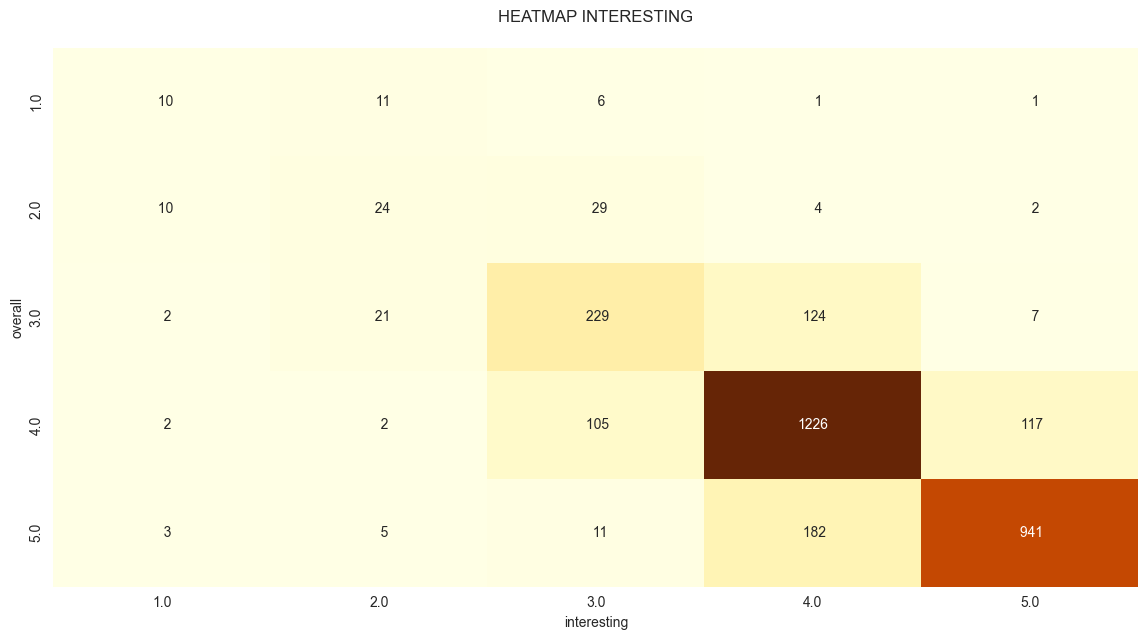

In [22]:
interesting_agg = data.dropna().groupby(['overall', 'interesting'])[
    'user_id'].count().reset_index()

interesting_heatmap = interesting_agg.pivot(index="overall",
                                            columns="interesting",
                                            values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(interesting_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP INTERESTING\n")
plt.ylabel("overall")
plt.xlabel("interesting")
plt.show()

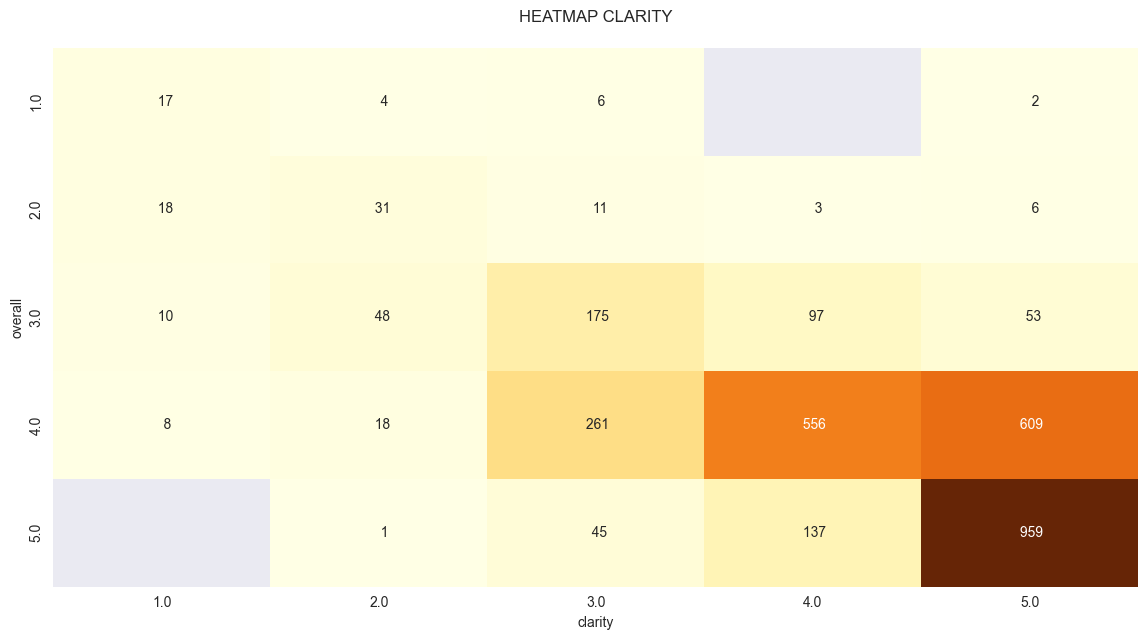

In [23]:
clarity_agg = data.dropna().groupby(['overall', 'clarity'])[
    'user_id'].count().reset_index()

clarity_heatmap = clarity_agg.pivot(index="overall",
                                    columns="clarity",
                                    values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(clarity_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP CLARITY\n")
plt.ylabel("overall")
plt.xlabel("clarity")
plt.show()

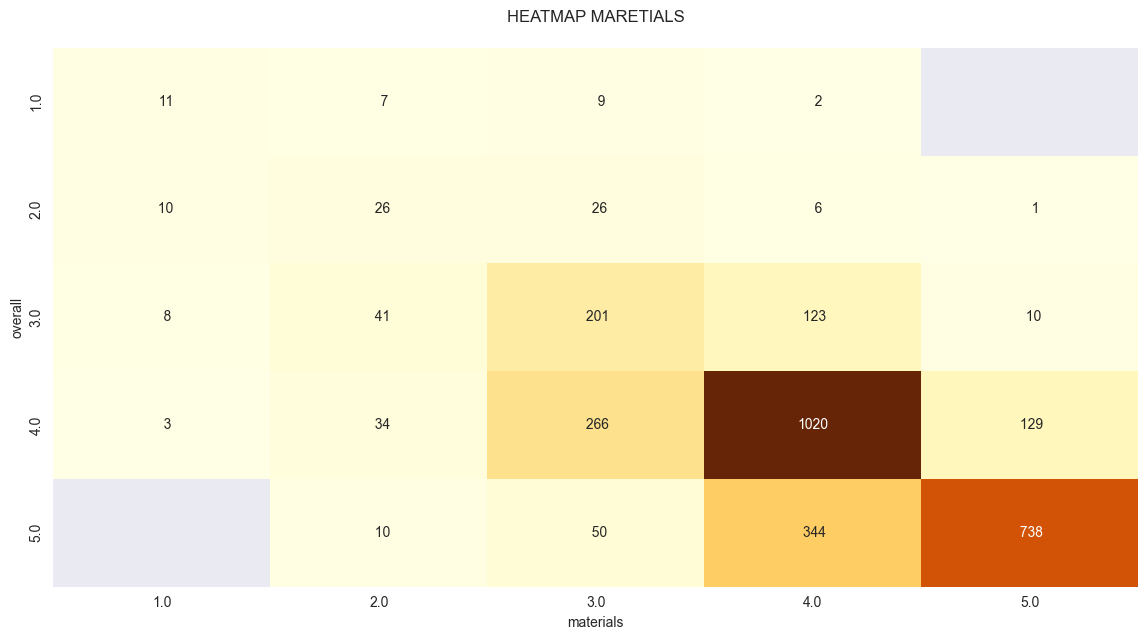

In [24]:
materials_agg = data.dropna().groupby(['overall', 'materials'])[
    'user_id'].count().reset_index()

materials_heatmap = materials_agg.pivot(index="overall",
                                        columns="materials",
                                        values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(materials_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP MARETIALS\n")
plt.ylabel("overall")
plt.xlabel("materials")
plt.show()

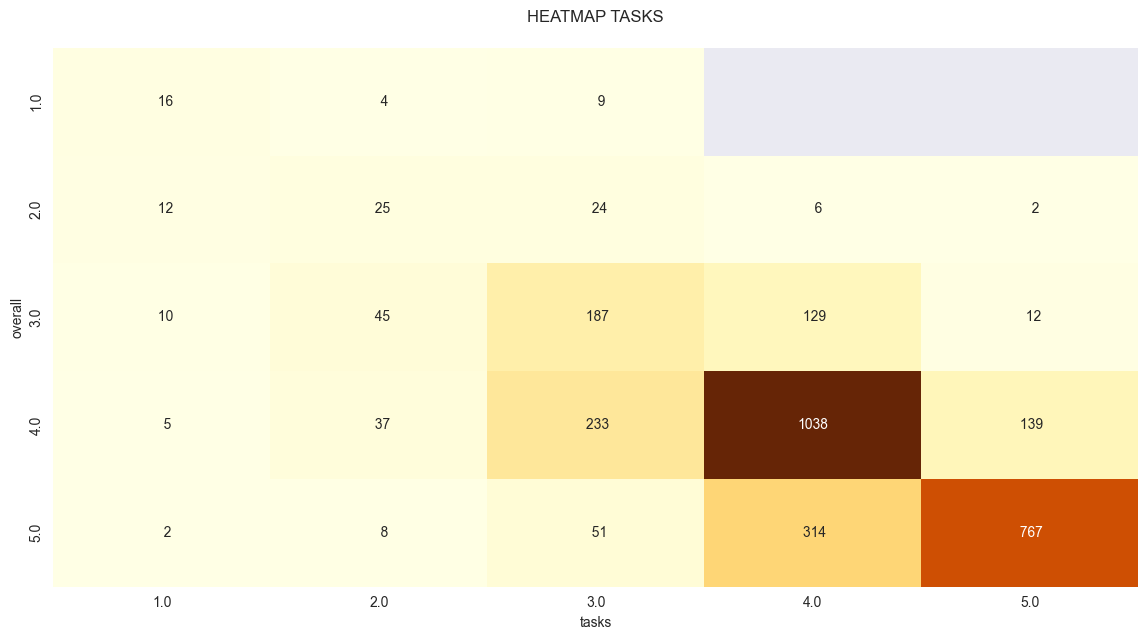

In [25]:
tasks_agg = data.dropna().groupby(['overall', 'tasks'])[
    'user_id'].count().reset_index()

tasks_heatmap = tasks_agg.pivot(index="overall",
                                columns="tasks",
                                values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(tasks_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP TASKS\n")
plt.ylabel("overall")
plt.xlabel("tasks")
plt.show()